# Function 2

## 학습목표
 1. 재귀함수 구현 및 사용 숙지
 2. Lambda 함수 이해 및 사용
 3. 모듈 임포트 후, 해당 모듈의 함수 사용법 

* binary search 구현

In [3]:
def binary_search(nums, x):
    s = 0
    e = len(nums) - 1
    
    while s <= e:
        mid = (s + e) / 2
        if nums[mid] == x:
            return mid
        elif nums[mid] > x:
            e = mid - 1
        else:
            s = mid + 1
            
    return -1

nums = [1, 2, 4, 5, 7, 8, 10, 22, 34, 56, 89, 100]

print binary_search(nums, 8)
print binary_search(nums, 1)
print binary_search(nums, 89)
print binary_search(nums, 88)
print binary_search(nums, 100)
print binary_search(nums, 101)

5
0
10
-1
11
-1


## Recursive Function

* 재귀함수
* 내부적으로 자기 자신을 호출함
* 점화식으로 표현되는 모든 수식을 간결히 표현할 수 있음
* 종료조건이 꼭! 필요함 (명시하지 않으면 무한 호출반복)
* 코드는 간결하나, 호출에 따른 오버헤드가 큼)


In [1]:
def c():
    return 1

def b():
    return 2 * c()

def a():
    return 3 * b()

print a()

6


In [51]:
# factorial을 다시 작성해 봅시다.
def factorial(n):
    mul = 1
    for i in range(2, n+1):
        mul *= i
        
    return mul


# assert는 True가 전달되면 아무런 동작을 하지 않고, False가 전달되면 예외 발생
assert(factorial(5) == 120)
assert(factorial(4) == 24)
assert(factorial(1) == 1)

In [52]:
def rf(n):
    if n == 1:
        return 1
    
    return n * rf(n-1)

assert(rf(5) == 120)
assert(rf(4) == 24)
assert(rf(1) == 1)

In [53]:
%timeit factorial(10000)

10 loops, best of 3: 20 ms per loop


In [54]:
import sys
sys.setrecursionlimit(200000)
%timeit rf(10000)

10 loops, best of 3: 23.8 ms per loop


In [55]:
def fibonacci(n):
    fibo = [1, 1]
    for i in range(2, n):
        fibo.append(fibo[i-1] + fibo[i-2])

    return fibo[-1]

print fibonacci(15)
%timeit fibonacci(20)

610
100000 loops, best of 3: 3.93 µs per loop


In [56]:
def recursive_fibonacci(n):
    if n == 1 or n == 2:
        return 1
    
    return recursive_fibonacci(n-1) + recursive_fibonacci(n-2)

print recursive_fibonacci(15)
%timeit recursive_fibonacci(20)

610
1000 loops, best of 3: 1.6 ms per loop


* memozation

In [57]:
fib_cache = {}

def recursive_fibonacci_memo(n):
    if n in fib_cache:
        return fib_cache[n]
    else:
        if n == 1 or n == 2:
            fib_cache[n] = 1
        else:
            fib_cache[n] =  recursive_fibonacci_memo(n-2) + recursive_fibonacci_memo(n-1)
            
        return fib_cache[n]

print recursive_fibonacci_memo(15)
%timeit recursive_fibonacci_memo(20)

610
The slowest run took 63.74 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 138 ns per loop


* recursive function 연습문제
 1. 숫자 리스트를 인자로 받아 그 숫자의 합을 구하는 재귀함수를 작성하시오.
 2. 숫자를 입력받아 각 자리수의 합을 구하는 재귀함수를 작성하시오.
 3. 주어진 두 수의 최대 공약수를 찾는 재귀함수를 작성하시오.
    A와 B의 최대 공약수는 B와 A%B의 최대 공약수와 같다.

In [122]:
# loop 이용
def list_sum(nums):
    s = 0
    for i in nums:
        s += i
        
    return s

# 기본 재귀
def lsr(nums, i):
    if i == len(nums):
        return 0
    return nums[i] + lsr(nums, i+1)

a = [1, 2, 4, 5, 6]
lsr(a, 0)

18

In [27]:
# fn = num[n] + fn-1을 이용한 경우
def recursive_sum(nums, k):
    if k == 0:
        return nums[k]
    
    return nums[k] + recursive_sum(nums, k-1)
    

a = [7, 2, 3, 4, 5]
print recursive_sum(a, len(a)-1)

21


In [123]:
def digit_sum(num, i):
    str_num = str(num)
    if i == len(str_num):
        return 0
    return int(str_num[i]) + digit_sum(num, i+1)

digit_sum(4543, 0)

16

In [6]:
def gcd(a, b):
    if b == 0:
        return a
    return gcd(b, a % b)

print gcd(50, 160)
print gcd(48, 36)
print gcd(36, 48)

10
12
12


* Lambda 함수
 + 단일문으로 표현되는 익명함수
 + 익명함수란 이름이 없는 구현체만 존재하는 간단한 함수를 의미
 + 코드 상에서 한번만 사용되는 기능이 있을 때, 굳이 함수로 만들지 않고 1회성으로 만들어서 쓸 때 사용.

In [2]:
def square(x): 
    return x ** 2

lambda x : x ** 2

square2 = lambda x : x ** 2

print square
print square2

print square(4), square2(4)

<function square at 0x10fcab758>
<function <lambda> at 0x1102bb0c8>
16 16


In [3]:
add3 = lambda x, y: x + y
print add3(20, 30)

50


In [4]:
nums = [(1, 2), (9, 5), (8, 4), (7, 6), (10, 2), (4, 5)]

def get_key(item):
    return item[1]

sorted()
print sorted(nums, key = get_key)
print sorted(nums, key = lambda x : x[0], reverse = True)

[(1, 2), (4, 5), (7, 6), (8, 4), (9, 5), (10, 2)]
[(1, 2), (10, 2), (8, 4), (9, 5), (4, 5), (7, 6)]
[(1, 2), (4, 5), (7, 6), (8, 4), (9, 5), (10, 2)]


* filter, map, reduce
 + lambda가 유용하게 사용되는 3가지 대표적 함수
 + 함수형 프로그래밍의 기본 요소이기도 함
 + filter : 특정 조건을 만족하는 요소만 남기고 필터링
 + map    : 각 원소를 주어진 수식에 따라 변형하여 새로운 리스트를 반환
 + reduce : 차례대로 앞 2개의 원소를 가지고 연산. 이 것을 마지막 원소까지 진행

In [5]:
nums = range(2, 100)

print filter(None, nums)
print filter(lambda x: x % 2 == 0, nums)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


* filter를 이용하여 문자열의 길이가 5이하인 문자열만 필터링 하시오.
 - 그런데, 혹시 또 다른 방법이 생각나지 않나요?
 

In [6]:
a = ['apple', 'cat', 'banana', 'hat', 'orange', 'carrot', 'python']
print filter(lambda x : len(x) <= 5, a)
print [x for x in a if len(x) <= 5]


['apple', 'cat', 'hat']
['apple', 'cat', 'hat']


In [7]:
nums = range(2, 20)
print map(lambda x: x**2, nums)

[4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


* map을 이용하여 섭씨/화씨 변환을 다시 해보죠.
 - 그런데, 혹시 또 다른 방법이 생각나진 않나요?
 


In [134]:
c = [39, 37, 36.5, 33.2, 30]
# f = 1.8 * c + 32

print map(lambda x : 1.8 * x + 32, c)

print [1.8 * i + 32 for i in c]

[102.2, 98.60000000000001, 97.7, 91.76, 86.0]
[102.2, 98.60000000000001, 97.7, 91.76, 86.0]


In [7]:
a = [1,2,3,4]
b = [17,12,11,10]
c = [-1,-4,5,9]

print map(lambda x, y, z : x + y + z, a, b, c)

[17, 10, 19, 23]


* reduce 이용하여 원소의 합 구하기

In [135]:
nums = [1, 2, 9, 8, 5, 4, 7, 10, 3]
print reduce(lambda x, y: x + y, nums)

49


* reduce로 리스트의 최대값을 구해봅시다.


In [137]:
print reduce(lambda x, y : x if x > y else y, nums)

10


* 연습문제
 1. filter를 직접 구현해봅시다. filter2(func, iterable):
 2. map을 직접 구현해봅시다. map2(func, iterable):


In [138]:
def filter2(func, nums):
    ret = []
    
    for i in nums:
        if func(i):
            ret.append(i)
            
    return ret

print filter2(lambda x : x % 2 == 1, range(1, 10))

[1, 3, 5, 7, 9]


In [ ]:
def map2(func, nums):
    ret = []
    
    for i in nums:
        ret.append(func(i))
            
    return ret

print map2(lambda x : x % 2 == 1, range(1, 10))

In [154]:
def map2(func, *nums):
    ret = []
    for i in range(len(nums)):
        val = 0
        for j in range(len(nums)):
            val += nums[j][i]
        ret.append(val)
    return ret

print map2(lambda x:x **2, range(1, 10))

[1]


* 에러 처리 하기 try, except
 + 예외 상황 발생 시, 적절한 대처를 위해 필요함
 + 함수 작성시, 발생할 수 있는 에러에 대해 처리하는 것이 좋은 습관임


In [19]:
5 / 0
nums = [1, 2, 3]
pos = 5
print nums[pos]
print nums[0]

ZeroDivisionError: integer division or modulo by zero

In [11]:
nums = [1, 2, 3]
pos = 4

try:
    print nums[pos]
    print 1, 2, 3
    print 4, 5, 6
except:
    print 'need a index between 0 and len(nums)-1', 'but got', pos
    
print nums[0]

need a index between 0 and len(nums)-1 but got 4
1


* finally 
 + 예외 발생 여부에 관계 없이 항상 실행해야할 코드

In [13]:
nums = [1, 2, 3]
pos = 4

try:
    print nums[pos]
except:
    print 'need a index between 0 and len(nums)-1', 'but got', pos
finally:
    print 'task done'
    
print nums[0]

need a index between 0 and len(nums)-1 but got 4
task done
1


* 예외 처리 세분화 
 + Exception으로 보편적으로 다 처리할 수 있다
 + 세분화하여 처리하면, 각 예외 상황에 따라 다른 처리를 할 수 있다.

In [17]:
nums = [0, 1, 2, 3]
pos1 = 2
pos2 = 0

try:
    print nums[pos1] / nums[pos2]
except IndexError as err:
    print 'need a index between 0 and len(nums)-1', 'but got', pos
    print str(err)
except ZeroDivisionError as other: #ZeroDivisionError
    print 'something else broke', other
finally:
    print 'task done'
    
print nums[0]

something else broke integer division or modulo by zero
task done
0


* 모듈 임포트
 + numpy - pip install numpy
 + scipy - pip install scipy (windows - https://sourceforge.net/projects/scipy/files/scipy/0.16.1/scipy-0.16.1-win32-superpack-python2.7.exe/download 
 http://aka.ms/vcpython27)
 + pandas - pip install pandas
 + sklearn  - pip install scikit-learn
 + matplotlib pip install matplotlib
 + statsmodels - pip install statsmodels
 + seaborn - pip install seaborn

* import / from import

In [18]:
import numpy # 모듈 임포트

print numpy.random.randint(100)

61


In [8]:
import numpy as np # 모듈 임포트 후 alias(별명) 붙임


print np.random.randint(100)
np.random.rand()

99


0.2363821165186828

In [11]:
from numpy import random as rd # numpy 모듈에서 하위 모듈인 random만을 import

print random.randint(100)


10


In [23]:
import numpy.random as random # numpy의 하위모듈인 random만을 import 후, alias 붙임


print random.randint(100)
print random.rand()

81
0.111968719205


In [33]:
import numpy as np
print np.random.rand()

0.0763549519071


 * 연습문제
  1. 다트를 던져서 파이(3.141592..)를 계산하는 동작을 시뮬레이션 하는 함수를 만들어 보세요

In [44]:
def get_pi(n):
    count = 0
    for i in range(n):
        x = np.random.rand()
        y = np.random.rand()
        
        if x**2 + y**2 <= 1:
            count += 1
            
    return float(count) / n * 4

print get_pi(10000000)
    

3.1412028


* matplotlib 모듈
 - 시각화 담당 모듈
 - 2차원, 3차원 그래프(선, 막대, 파이차트 등등)

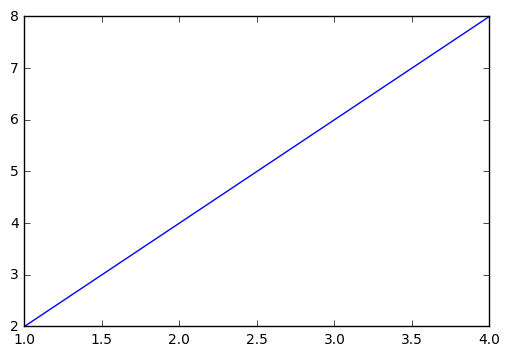

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

plt.plot(x, y)
plt.show()

* request module
 - http를 통한 web resource에 접근할 때 사용

In [46]:
import requests
response = requests.get('http://www.naver.com')
print response.text


<!doctype html>
<html lang="ko">
<head>
<meta charset="utf-8">
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=960">
<meta name="apple-mobile-web-app-title" content="NAVER" />
<meta property="og:title" content="네이버 메인">
<meta property="og:url" content="http://www.naver.com/">
<meta property="og:image" content="http://static.naver.net/www/mobile/edit/2016/0705/mobile_212852414260.png">
<meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">
<meta name="twitter:card" content="summary">
<meta name="twitter:title" content="네이버 메인">
<meta name="twitter:url" content="http://www.naver.com/">
<meta name="twitter:image" content="http://static.naver.net/www/mobile/edit/2016/0705/mobile_212852414260.png">
<meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">
<link rel="shortcut icon" type="

* collections module
 - https://docs.python.org/2/library/collections.html#collections.OrderedDict

* Counter 
  - counting을 목적으로 하는 객체
* defaultdict
  - 기본값을 갖는 dictionary
* OrderedDict
  - 순서를 갖는 dictionary (key가 삽입된 순서)

In [47]:
from collections import Counter

a = [1, 1, 2, 1, 2, 3, 3, 2, 4, 5, 5, 1]
b = Counter(a)
print b
print b.most_common()
print b[1]

Counter({1: 4, 2: 3, 3: 2, 5: 2, 4: 1})
[(1, 4), (2, 3), (3, 2), (5, 2), (4, 1)]
4


In [50]:
from collections import defaultdict

a = [1, 1, 2, 1, 2, 3, 3, 2, 4, 5, 5, 1]
num_dict = defaultdict(int)
for i in a:
    num_dict[i] += 1
        
print num_dict

defaultdict(<type 'int'>, {1: 4, 2: 3, 3: 2, 4: 1, 5: 2})


In [20]:
from collections import OrderedDict

dict1 = OrderedDict()
dict1['a'] = 1
dict1['c'] = 2
dict1['b'] = 100

print dict1

OrderedDict([('a', 1), ('c', 2), ('b', 100)])


* 과제 
 1. reduce를 직접 구현하세요 reduce2(func, iterable)
 2. 이진탐색을 재귀함수로 구현해보세요.